In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [45]:
import pandas as pd
from langchain_experimental.agents.agent_toolkits.pandas.base import (create_pandas_dataframe_agent)
import os
from google.colab import userdata
from langchain_community.llms import Replicate
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import textblob

In [ ]:
# Menyimpan API token secara manual
api_token = userdata.get("api_token")

#Set Token into Variable
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
df = pd.read_csv("cyberbullying_tweets.csv")
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
#Create Replicate Model
parameters = {
    "top_k" : 5,
    "top_p" : 1.0,
    "max_tokens" : 4096,
    "min_tokens" : 0,
    "random_seed" : None,
    "temperature" : 0.7,
    "repetition_penalty" : 1,
    #"stop_sequences" : [],
    #"stopping_criteria": "length(256 tokens)", # Removed this line
    "presence_penalty" : 0,
    "frequency_penalty" : 0,
}

# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

In [ ]:
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

**Reasoning**:
I need to use the agent to perform sentiment analysis on the 'tweet_text' column and add the results to a new 'sentiment' column in the dataframe. The agent needs to be instructed to categorize the sentiment as 'positive', 'negative', or 'neutral'.



In [ ]:
from textblob import TextBlob

# Initialize sentiment column
df['sentiment'] = ''

# Iterate over the rows and classify sentiment
for index, row in df.iterrows():
    analysis = TextBlob(row['tweet_text'])
    if analysis.sentiment.polarity > 0:
        df.loc[index, 'sentiment'] = 'positive'
    elif analysis.sentiment.polarity == 0:
        df.loc[index, 'sentiment'] = 'neutral'
    else:
        df.loc[index, 'sentiment'] = 'negative'

display(df.head())

,tweet_text,cyberbullying_type,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying,negative
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,neutral
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,positive
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,positive
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,neutral


In [ ]:
cross_tab = pd.crosstab(df['cyberbullying_type'], df['sentiment'])
display(cross_tab)

sentiment,negative,neutral,positive
cyberbullying_type,,,
age,2473,717,4802
ethnicity,6251,251,1459
gender,2185,1475,4313
not_cyberbullying,1759,3488,2698
other_cyberbullying,2466,2760,2597
religion,3996,1356,2646


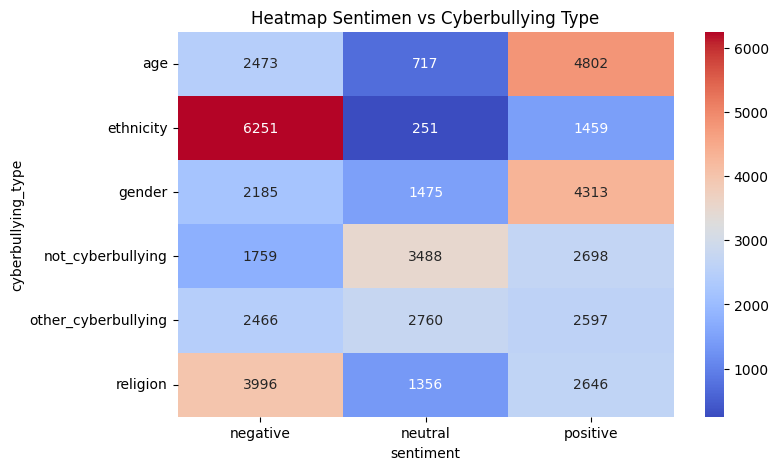

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap Sentimen vs Cyberbullying Type")
plt.show()

In [ ]:
# Filter the dataframe for ethnicity cyberbullying
ethnicity_df = df[df['cyberbullying_type'] == 'ethnicity']

# Concatenate tweet_text values into a single string
text_string = ' '.join(ethnicity_df['tweet_text'])

# Import necessary libraries for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)


# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text_string.lower()) # Convert to lowercase
filtered_text = [w for w in word_tokens if w.isalpha() and w not in stop_words] # Filter out punctuation and non-alphabetic tokens

# Get frequency distribution of words
fdist = FreqDist(filtered_text)

# Print the most common words
most_common_ethnicity = fdist.most_common(20)
print("Most common words in ethnicity-based cyberbullying comments:")
print(most_common_ethnicity)


Most common words in ethnicity-based cyberbullying comments:
[('fuck', 5196), ('dumb', 5194), ('nigger', 4414), ('ass', 2272), ('black', 2077), ('u', 1802), ('white', 1509), ('niggers', 1315), ('rt', 1215), ('people', 1178), ('obama', 1143), ('like', 1006), ('ur', 999), ('one', 993), ('bitch', 933), ('called', 902), ('first', 756), ('racism', 723), ('anything', 710), ('past', 666)]


In [ ]:
# Filter the dataframe for ethnicity cyberbullying
religion_df = df[df['cyberbullying_type'] == 'religion']

# Concatenate tweet_text values into a single string
text_string = ' '.join(religion_df['tweet_text'])

# Import necessary libraries for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)


# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text_string.lower()) # Convert to lowercase
filtered_text = [w for w in word_tokens if w.isalpha() and w not in stop_words] # Filter out punctuation and non-alphabetic tokens

# Get frequency distribution of words
fdist = FreqDist(filtered_text)

# Print the most common words
most_common_religion = fdist.most_common(20)
print("Most common words in ethnicity-based cyberbullying comments:")
print(most_common_religion)


Most common words in ethnicity-based cyberbullying comments:
[('muslims', 2389), ('muslim', 2311), ('idiot', 1762), ('christian', 1493), ('u', 1474), ('idiots', 1339), ('islamic', 1261), ('like', 1239), ('islam', 1206), ('terrorism', 1140), ('radical', 1073), ('right', 1067), ('people', 1066), ('support', 1040), ('woman', 953), ('amp', 880), ('terrorist', 751), ('isis', 683), ('know', 668), ('terrorists', 652)]


In [ ]:
# Filter the dataframe for ethnicity cyberbullying
age_df = df[df['cyberbullying_type'] == 'age']

# Concatenate tweet_text values into a single string
text_string = ' '.join(age_df['tweet_text'])

# Import necessary libraries for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)


# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text_string.lower()) # Convert to lowercase
filtered_text = [w for w in word_tokens if w.isalpha() and w not in stop_words] # Filter out punctuation and non-alphabetic tokens

# Get frequency distribution of words
fdist = FreqDist(filtered_text)

# Print the most common words
most_common_age = fdist.most_common(20)
print("Most common words in ethnicity-based cyberbullying comments:")
print(most_common_age)

Most common words in ethnicity-based cyberbullying comments:
[('school', 8218), ('high', 4940), ('bullied', 4378), ('bully', 2725), ('girl', 2337), ('girls', 2330), ('like', 1850), ('bullies', 1626), ('one', 954), ('people', 933), ('got', 848), ('middle', 715), ('would', 713), ('get', 683), ('amp', 585), ('kids', 528), ('know', 458), ('back', 443), ('never', 432), ('friends', 396)]


In [ ]:
agent.invoke({"input": "How many cyberbullying types are there and what are they"})



> Entering new AgentExecutor chain...
Thought: The question asks for the distinct cyberbullying types present in the dataframe and their count. I need to examine the unique values in the `cyberbullying_type` column.

Action: python_repl_ast

Action Input: `print(df['cyberbullying_type'].unique())`

['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']
There are six distinct types of cyberbullying present in the dataframe. They are: 'not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', and 'ethnicity'.

Final Answer: There are six distinct types of cyberbullying in the dataframe: 'not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', and 'ethnicity'.

> Finished chain.


{'input': 'How many cyberbullying types are there and what are they',
 'output': "There are six distinct types of cyberbullying in the dataframe: 'not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', and 'ethnicity'."}

In [ ]:
agent.invoke({"input": "Are there any examples of sarcasm or hidden (implicit) bullying?"})

In [42]:
prompt = [
"""
You are a sentiment analysis expert.

Analyze the dataset labeled by cyberbullying type: not_cyberbullying, gender, religion, age, ethnicity, or other_cyberbullying.

Your task is to:
1. Identify the predominant emotional tones in each cyberbullying category (e.g., anger, sarcasm, disgust, mockery).
2. Highlight examples that show emotionally intense or psychologically harmful language.
3. Compare the emotional tone of bullying tweets to those labeled as 'not_cyberbullying'.
4. Discuss which types of cyberbullying may have the most lasting emotional impact and why.

Provide your analysis in bullet points.
"""
]

print(f"Prompt:\n{prompt}\n")
output= llm.invoke(prompt)
print(f"Output:\n{output}\n")
print("-" * 50)

Prompt:
[" \nYou are a sentiment analysis expert.\n\nAnalyze the dataset labeled by cyberbullying type: not_cyberbullying, gender, religion, age, ethnicity, or other_cyberbullying.\n\nYour task is to:\n1. Identify the predominant emotional tones in each cyberbullying category (e.g., anger, sarcasm, disgust, mockery).\n2. Highlight examples that show emotionally intense or psychologically harmful language.\n3. Compare the emotional tone of bullying tweets to those labeled as 'not_cyberbullying'.\n4. Discuss which types of cyberbullying may have the most lasting emotional impact and why.\n\nProvide your analysis in bullet points.\n"]

Output:
- **Predominant Emotional Tones in Each Cyberbullying Category:**

  - **Gender:** The prevalent emotional tones include anger, disgust, and mockery, often targeting individuals based on their perceived gender identity or expression. Examples: "Men are always like this, don't bother with them" (dismissive mockery) and "She's just a drama queen, igno